<a href="https://colab.research.google.com/github/YunHoLeee/MRIK/blob/main/%EC%9B%B9%ED%88%B0%EC%97%B0%EA%B5%AC_%EC%B5%9C%EC%A2%85_%EA%B8%B0%EB%B3%B8%ED%86%B5%EA%B3%84%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests  # HTTP 요청을 보내기 위한 라이브러리
import pickle  # 객체를 파일로 저장하고 불러오기 위한 라이브러리
import time  # 시간 관련 함수 제공 (예: 지연, 현재 시간)
import sys  # 파이썬 인터프리터와 관련된 작업을 수행하기 위한 라이브러리

# sys.setrecursionlimit(10000000)  # 재귀 호출의 한도를 설정 (주석 처리됨)
# from mpire import WorkerPool  # 병렬 처리 라이브러리 (주석 처리됨)

import pandas as pd  # 데이터 조작 및 분석을 위한 라이브러리
from tqdm.notebook import tqdm  # 루프의 진행 상황을 시각적으로 보여주는 라이브러리
from random import uniform  # 임의의 실수를 생성하는 함수
import lxml  # XML 및 HTML 문서를 처리하기 위한 라이브러리
import lxml.etree as et  # XML 및 HTML 문서를 생성하고 수정하기 위한 라이브러리
from bs4 import BeautifulSoup  # HTML 및 XML 문서를 구문 분석하기 위한 라이브러리
import glob  # 파일 경로 패턴을 처리하기 위한 라이브러리
import urllib3  # HTTP 클라이언트를 위한 라이브러리
urllib3.disable_warnings()  # urllib3에서 발생하는 경고를 비활성화
from natsort import natsorted  # 자연스러운 정렬을 위한 라이브러리
import re  # 정규 표현식 작업을 위한 라이브러리
import gdown  # Google Drive에서 파일을 다운로드하기 위한 라이브러리
from concurrent.futures import ThreadPoolExecutor  # 멀티스레딩을 위한 라이브러리
!pip install openpyxl

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# 엑셀 파일 업로드
uploaded = files.upload()



Saving 1.2. updated_웹툰연구사 정리 데이터 최종(~2023) 고유학술지명 추가본.xlsx to 1.2. updated_웹툰연구사 정리 데이터 최종(~2023) 고유학술지명 추가본.xlsx


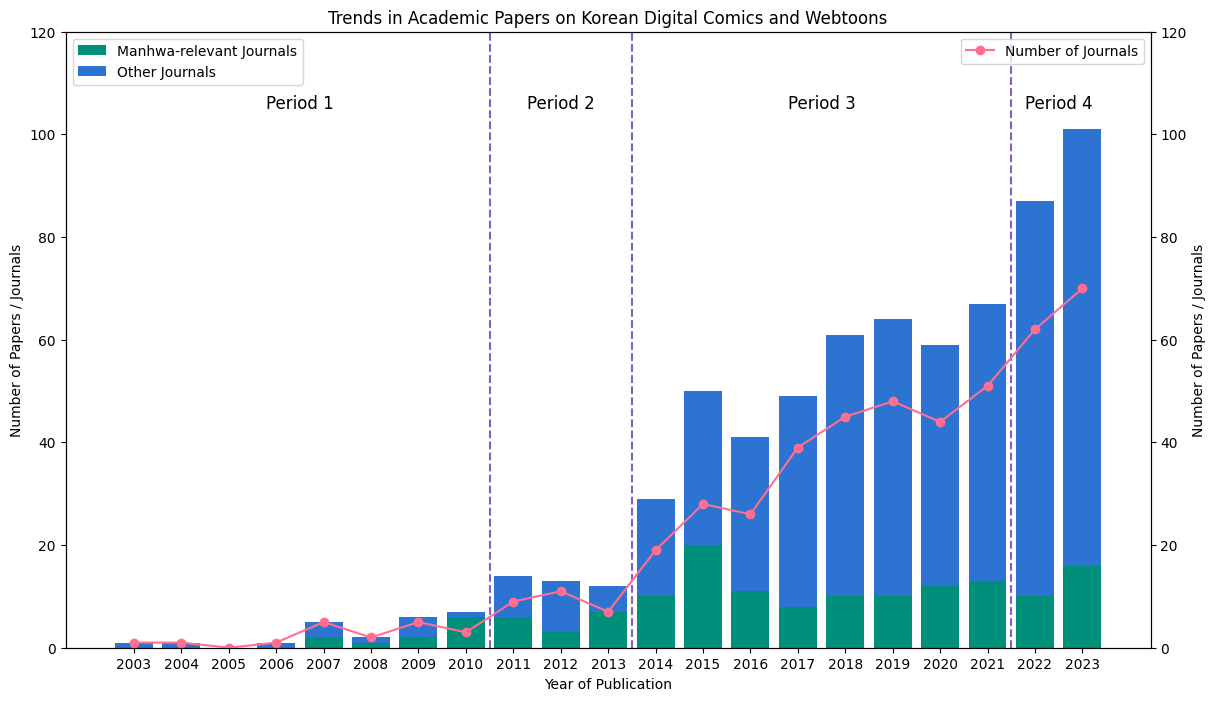

In [ ]:
# 업로드된 파일 경로 가져오기
file_path = list(uploaded.keys())[0]

# Load the Excel file
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Define the function to classify periods
def period_classification(year):
    if 2003 <= year <= 2010:
        return 'Period 1'
    elif 2011 <= year <= 2013:
        return 'Period 2'
    elif 2014 <= year <= 2021:
        return 'Period 3'
    elif 2022 <= year <= 2023:
        return 'Period 4'
    else:
        return None

# Add a new column for period classification
data['Period'] = data['발행연도'].apply(period_classification)

# Define the list of years and journals
years = list(range(2003, 2024))
journals = [
    '한국만화애니메이션학회 - 만화애니메이션연구',
    '한국애니메이션학회 - 애니메이션연구',
    '(사)한국만화웹툰학회 - 만화웹툰연구'
]

# Define the function to categorize journals
def journal_category(row):
    if row in journals:
        return 'Manhwa-relevant Journals'
    else:
        return 'Other Journals'

# Add a new column for journal categorization
data['Journal Category'] = data['고유 학술지명'].apply(journal_category)

# Group and reindex the data for plotting
categorized_data = data.groupby(['발행연도', 'Journal Category']).size().unstack(fill_value=0).reindex(years, fill_value=0)
journal_counts = data.groupby('발행연도')['고유 학술지명'].nunique().reindex(years, fill_value=0)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot
bar_width = 0.8
p1 = ax1.bar(categorized_data.index, categorized_data['Manhwa-relevant Journals'], bar_width, color='#008F7A', label='Manhwa-relevant Journals')
p2 = ax1.bar(categorized_data.index, categorized_data['Other Journals'], bar_width, bottom=categorized_data['Manhwa-relevant Journals'], color='#2C73D2', label='Other Journals')

# Line plot
ax2 = ax1.twinx()
line = ax2.plot(journal_counts.index, journal_counts, color='#FF6F91', marker='o', label='Number of Journals')

# Adding period separators and text
periods = {
    'Period 1': (2003, 2010),
    'Period 2': (2011, 2013),
    'Period 3': (2014, 2021),
    'Period 4': (2022, 2023)
}
for period, (start, end) in periods.items():
    if start != 2003:
        ax1.axvline(x=start-0.5, color='#845EC2', linestyle='--')
    ax1.text((start + end) / 2, 105, period, horizontalalignment='center', fontsize=12, color='black')

# Customizing the plot
ax1.set_xlabel('Year of Publication')
ax1.set_ylabel('Number of Papers / Journals')
ax2.set_ylabel('Number of Papers / Journals')
ax1.set_title('Trends in Academic Papers on Korean Digital Comics and Webtoons')
ax1.set_xticks(years)
ax1.set_ylim(0, 120)
ax2.set_ylim(0, 120)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


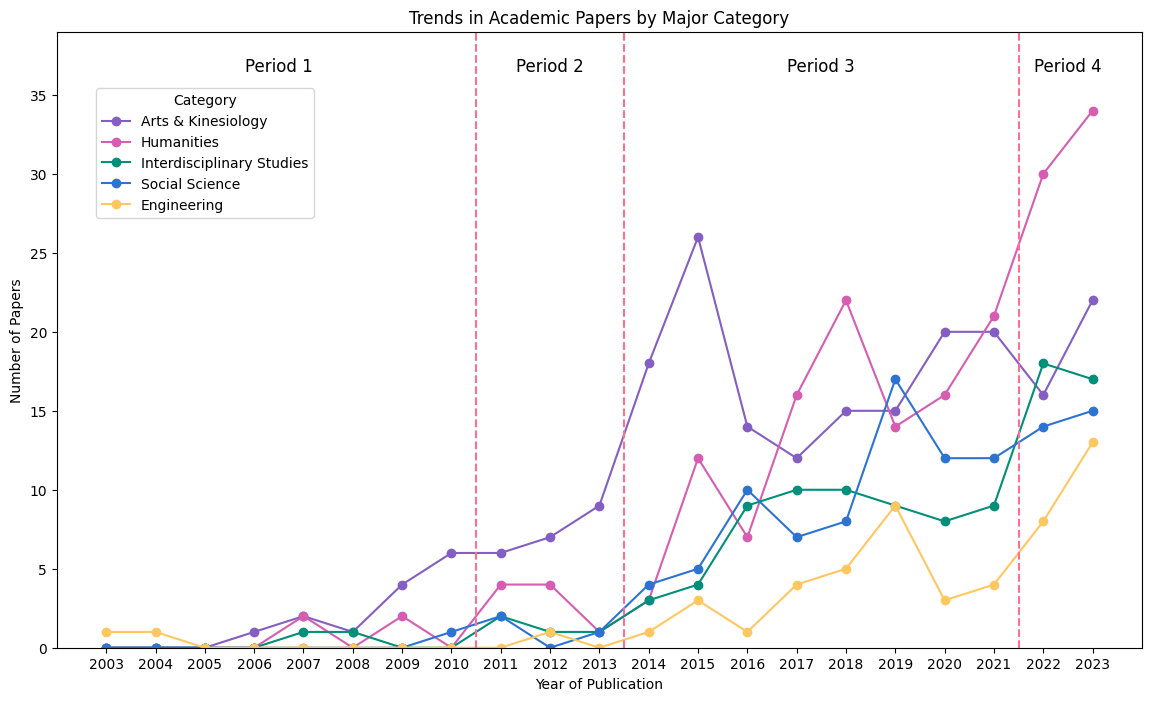

In [ ]:
# Load the Excel file
file_path = '/content/1.2. updated_웹툰연구사 정리 데이터 최종(~2023) 고유학술지명 추가본.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Correct the translation for '예술체육학' and other categories
data['대분류'] = data['대분류'].replace({
    '예술체육학': 'Arts & Kinesiology',
    '공학': 'Engineering',
    '인문학': 'Humanities',
    '사회과학': 'Social Science',
    '복합학': 'Interdisciplinary Studies'
})

# Filter the data to include only specified categories
categories_to_include = [
    'Arts & Kinesiology',
    'Humanities',
    'Interdisciplinary Studies',
    'Social Science',
    'Engineering',
]
data = data[data['대분류'].isin(categories_to_include)]

# Define the function to classify periods
def period_classification(year):
    if 2003 <= year <= 2010:
        return 'Period 1'
    elif 2011 <= year <= 2013:
        return 'Period 2'
    elif 2014 <= year <= 2021:
        return 'Period 3'
    elif 2022 <= year <= 2023:
        return 'Period 4'
    else:
        return None

# Add a new column for period classification
data['Period'] = data['발행연도'].apply(period_classification)

# Define the list of years
years = list(range(2003, 2024))

# Group and reindex the data for plotting
category_data = data.groupby(['발행연도', '대분류']).size().unstack(fill_value=0).reindex(years, fill_value=0)

# Define new colors for each category
new_colors = {
    'Humanities': '#D65DB1',  # Custom Pink
    'Social Science': '#2C73D2',  # Custom Blue
    'Arts & Kinesiology': '#845EC2',  # Custom Purple
    'Engineering': '#FFC75F',  # Custom Yellow
    'Interdisciplinary Studies': '#008F7A'  # Custom Green
}

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Line plot for each category
for category in categories_to_include:
    ax1.plot(category_data.index, category_data[category], marker='o', label=category, color=new_colors.get(category, '#000000'))

# Adding period separators and text
periods = {
    'Period 1': (2003, 2010),
    'Period 2': (2011, 2013),
    'Period 3': (2014, 2021),
    'Period 4': (2022, 2023)
}
for period, (start, end) in periods.items():
    if start != 2003:
        ax1.axvline(x=start-0.5, color='#FF6F91', linestyle='--')
    ax1.text((start + end) / 2, category_data.max().max() + 2.5, period, horizontalalignment='center', fontsize=12, color='black')

# Customizing the plot
ax1.set_xlabel('Year of Publication')
ax1.set_ylabel('Number of Papers')
ax1.set_title('Trends in Academic Papers by Major Category')
ax1.set_xticks(years)
ax1.set_ylim(0, category_data.max().max() + 5)
ax1.legend(title='Category', loc='upper left', bbox_to_anchor=(0.03, 0.92))

plt.show()

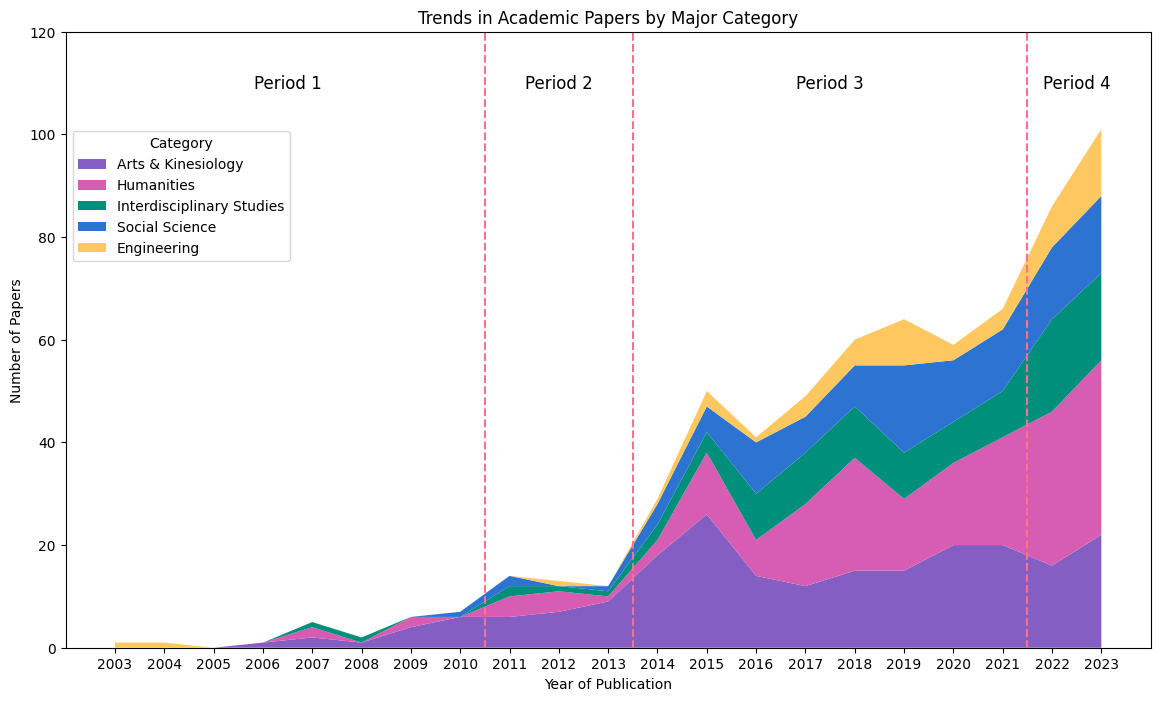

In [ ]:
# 그래프 생성
fig, ax1 = plt.subplots(figsize=(14, 8))

# 면적 그래프 생성
ax1.stackplot(category_data.index, [category_data[category] for category in categories_to_include], labels=categories_to_include, colors=[new_colors[category] for category in categories_to_include])

# 기간 구분선 및 텍스트 추가
periods = {
    'Period 1': (2003, 2010),
    'Period 2': (2011, 2013),
    'Period 3': (2014, 2021),
    'Period 4': (2022, 2023)
}
for period, (start, end) in periods.items():
    if start != 2003:
        ax1.axvline(x=start-0.5, color='#FF6F91', linestyle='--')
    ax1.text((start + end) / 2, category_data.max().max() + 75, period, horizontalalignment='center', fontsize=12, color='black')

# 그래프 커스터마이징
ax1.set_xlabel('Year of Publication')
ax1.set_ylabel('Number of Papers')
ax1.set_title('Trends in Academic Papers by Major Category')
ax1.set_xticks(years)
ax1.set_ylim(0, 120)
ax2.set_ylim(0, 120)
ax1.legend(title='Category', loc='upper left', bbox_to_anchor=(0, 0.85))  # 범례를 조금 아래로 이동

plt.show()